In [230]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as smp
import sdeint
from sympy import real_roots
import matplotlib.colors as mcolors
import matplotlib.cm as cm

## Characterisation of the Hooke's Law Potential

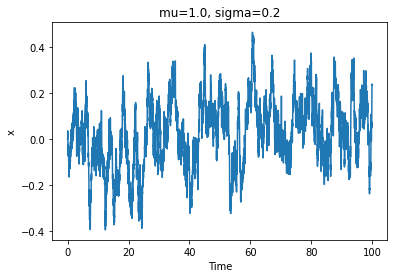

In [2]:
def simulate(mu, sigma, dt, t_end):
    t = np.arange(0, t_end, dt)
    x = np.zeros_like(t)
    for i in range(1, t.shape[0]):
        dW = np.random.normal(0, np.sqrt(dt))
        x[i] = x[i-1] - mu * x[i-1] * dt + sigma * dW
    return t, x

mu = 1.0
sigma = 0.2
dt = 0.01
t_end = 100

t, x = simulate(mu, sigma, dt, t_end)

plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('x')
plt.title(f"mu={mu}, sigma={sigma}")
plt.show()


In [55]:
def U(x, mu):
    return -0.5 * mu * x **2
def simulate_hookes(x0, mu, sigma, dt, t_end):
    t = np.arange(0, t_end, dt)
    x = np.zeros_like(t)
    x[0] = x0
    for i in range(1, t.shape[0]):
        dW = np.random.normal(0, np.sqrt(dt))
        x[i] = x[i-1] - mu * x[i-1] * dt + sigma * dW
    return t, x

## Case 1: No noise

In [63]:
x0 = 1
mu1 = 1
mu2 = 3
sigma = 0.0
t = np.linspace(0, 10, 1000)
dt = t[1] - t[0]

In [68]:
t, x_det = simulate_hookes(x0, 1, sigma, dt, t_end)

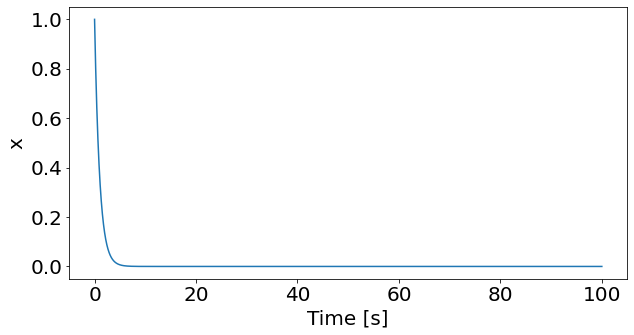

In [69]:
plt.figure(figsize=(10, 5))
plt.plot(t, x_det)
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('x', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Plot potential landscape

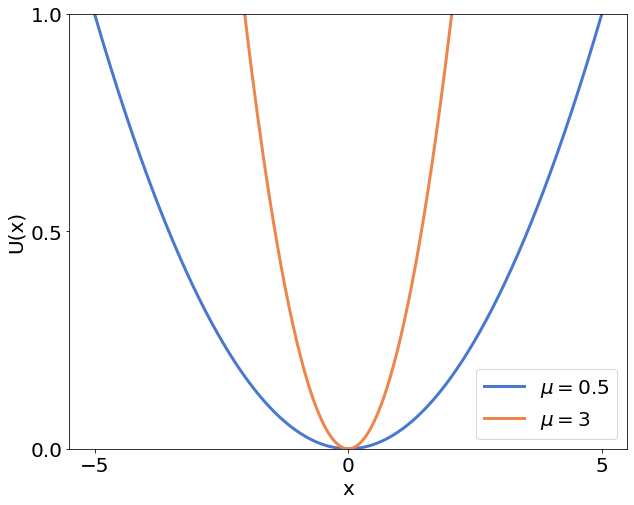

In [91]:
plt.figure(figsize=(10, 8))
cmap = sns.palettes.color_palette('muted', 2)
plt.plot(np.linspace(-5,5, 400), U(np.linspace(-2,2, 400), -0.5), c=cmap[0], lw=3, label='$\mu=0.5$')
plt.plot(np.linspace(-5,5, 400), U(np.linspace(-2,2, 400), -3), c=cmap[1], lw=3, label='$\mu=3$')
#plt.hist(x_det, bins=50, density=True, label='Histogram')
plt.xlabel('x', fontsize=20)
plt.ylabel('U(x)', fontsize=20)
plt.ylim(0, 1)
plt.yticks([0, 0.5, 1],fontsize=20)
plt.xticks([-5, 0, 5],fontsize=20)
plt.legend(fontsize=20, loc='lower right')
plt.savefig('hookes_potential_mu1.png', dpi=400, transparent=True)
#plt.show()

In [141]:
x0 = 1
sigma = 0.0
t = np.linspace(0, 10, 1000)
dt = t[1] - t[0]
t1, x_det1 = simulate_hookes(x0, 0.5, sigma, dt, t_end)
t2, x_det2 = simulate_hookes(x0, 3, sigma, dt, t_end)

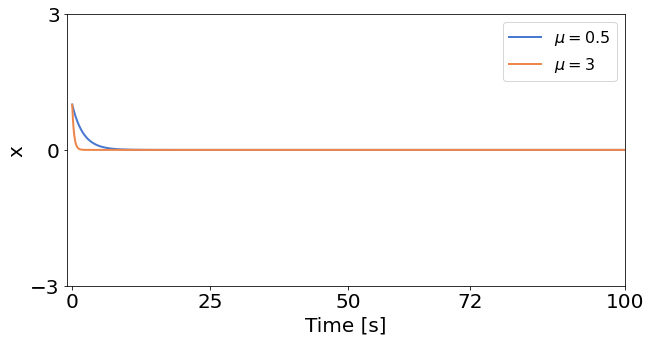

In [143]:
plt.figure(figsize=(10, 5))
plt.plot(t1, x_det1, c=cmap[0], lw=2, label='$\mu=0.5$')
plt.plot(t2, x_det2, c=cmap[1], lw=2, label='$\mu=3$')
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('x', fontsize=20)
plt.ylim(-3, 3)
plt.yticks([-3, 0, 3],fontsize=20)
plt.xlim(-1, 100)
plt.xticks([0, 25, 50, 72, 100],fontsize=20)
plt.legend(fontsize=16, loc='upper right')
plt.savefig('hookes_sigma0.svg', transparent=True)
#plt.show()

## Case 2 Low Noise

In [144]:
x0 = 1
sigma = 0.1
t = np.linspace(0, 10, 1000)
dt = t[1] - t[0]
t1, x_det1 = simulate_hookes(x0, 0.5, sigma, dt, t_end)
t2, x_det2 = simulate_hookes(x0, 3, sigma, dt, t_end)

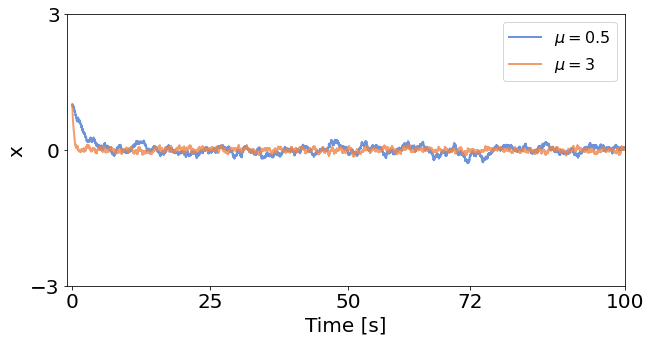

In [145]:
plt.figure(figsize=(10, 5))
plt.plot(t1, x_det1, c=cmap[0], lw=2, label='$\mu=0.5$', alpha=0.8)
plt.plot(t2, x_det2, c=cmap[1], lw=2, label='$\mu=3$', alpha=0.8)
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('x', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16, loc='upper right')
plt.ylim(-3, 3)
plt.yticks([-3, 0, 3],fontsize=20)
plt.xlim(-1, 100)
plt.xticks([0, 25, 50, 72, 100],fontsize=20)
plt.savefig('hookes_sigma01.svg', transparent=True)

# Case 3 High Noise

In [150]:
x0 = 1
sigma = 1
t = np.linspace(0, 10, 1000)
dt = t[1] - t[0]
t1, x_det1 = simulate_hookes(x0, 0.5, sigma, dt, t_end)
t2, x_det2 = simulate_hookes(x0, 3, sigma, dt, t_end)

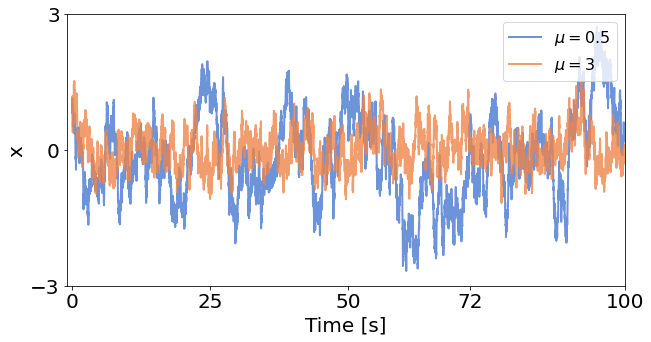

In [151]:
plt.figure(figsize=(10, 5))
plt.plot(t1, x_det1, c=cmap[0], lw=2, label='$\mu=0.5$', alpha=0.8)
plt.plot(t2, x_det2, c=cmap[1], lw=2, label='$\mu=3$', alpha=0.8)
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('x', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16, loc='upper right')
plt.ylim(-3, 3)
plt.yticks([-3, 0, 3],fontsize=20)
plt.xlim(-1, 100)
plt.xticks([0, 25, 50, 72, 100],fontsize=20)
plt.savefig('hookes_sigma1.svg', transparent=True)

## Bistable Potential

We have a bistable system of the form:
$$\dot{x} = \mu + x - x^3$$
The corresponding potential (w/o integration constant) is given by:
$$U(x) = -\mu x - \frac{x^2}{2} + \frac{x^4}{4}$$

In [199]:
def U_bistable(x, mu):
    return -mu * x - 0.5 * x ** 2 + 0.25 * x**4
def gen_bistable(x0, mu, eta, N):
    sols_list = list()
    dt = 0.01
    regime_list = list()
    l= ((N+500)*dt)
    tspan = np.arange(0, l, dt)
    def f(state, t):
        x = state
        dxdt = mu + x - x**3
        return dxdt
    ic = np.array([x0])
    gw = lambda y, t: eta * np.identity(ic.shape[0])
    fw = lambda y, t: np.array(f(y,t))
    sol = sdeint.itoint(fw, gw, np.array(ic), tspan)
    sols_list.append(sol[500:])
    X = smp.Symbol('x', real=True)
    eq = mu + X - X**3
    roots = [j.n(6) for j in real_roots(eq, X)]
    max_root = np.max(roots)
    min_root = np.min(roots)
    max_actual = np.max(sol[500:])
    min_actual = np.min(sol[500:])
    # check for switching condition
    if (len(roots) > 1) & (max_actual >= max_root) & (min_actual <= min_root):
        regime_list.append('Bistable Switching')
    else:
        regime_list.append('Bistable Fixed Point')

    return sols_list, regime_list


In [200]:
sols, regime = gen_bistable(0.1, 0.0, 0.1, 5000)

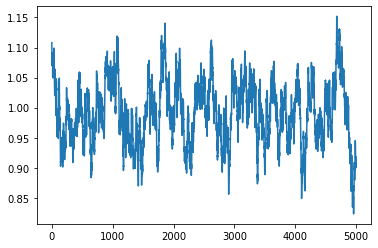

In [201]:
plt.plot(sols[0])

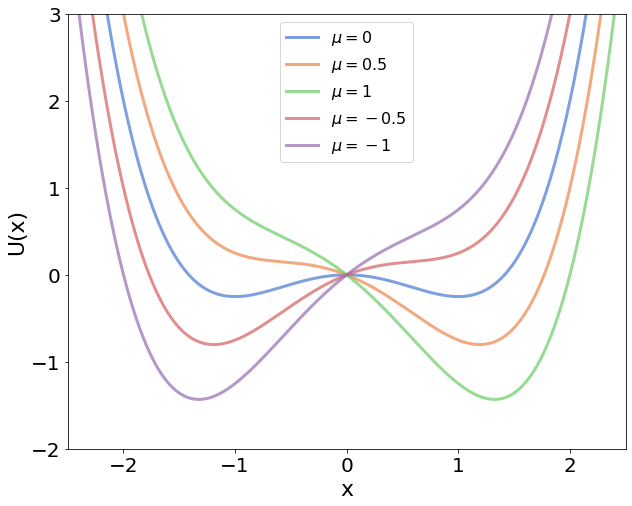

In [229]:
plt.figure(figsize=(10, 8))
cmap = sns.palettes.color_palette('muted', 5)
#plt.plot(np.linspace(-5,5, 400), U_bistable(np.linspace(-2,2, 400), -0.5), c=cmap[0], lw=3, label='$\mu=0.5$')
#plt.plot(np.linspace(-5,5, 400), U_bistable(np.linspace(-2,2, 400), -3), c=cmap[1], lw=3, label='$\mu=3$')
plt.plot(np.linspace(-3,3, 400), U_bistable(np.linspace(-3, 3, 400), 0), c=cmap[0], lw=3, alpha=0.7, label='$\mu=0$')
plt.plot(np.linspace(-3,3, 400), U_bistable(np.linspace(-3, 3, 400), 0.5), c=cmap[1], lw=3, alpha=0.7, label='$\mu=0.5$')
plt.plot(np.linspace(-3,3, 400), U_bistable(np.linspace(-3, 3, 400), 1), c=cmap[2], lw=3, alpha=0.7, label='$\mu=1$')

plt.plot(np.linspace(-3,3, 400), U_bistable(np.linspace(-3, 3, 400), -0.5), c=cmap[3], lw=3, alpha=0.7, label='$\mu=-0.5$')
plt.plot(np.linspace(-3,3, 400), U_bistable(np.linspace(-3, 3, 400), -1), c=cmap[4], lw=3, alpha=0.7, label='$\mu=-1$')

plt.legend(loc='upper center', fontsize=16)

plt.xlabel('x', fontsize=22)
plt.ylabel('U(x)', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-2, 3)
plt.xlim(-2.5, 2.5)
plt.savefig('bistable_potential.svg', transparent=True)
#plt.show()

(-2.1, 2.1)

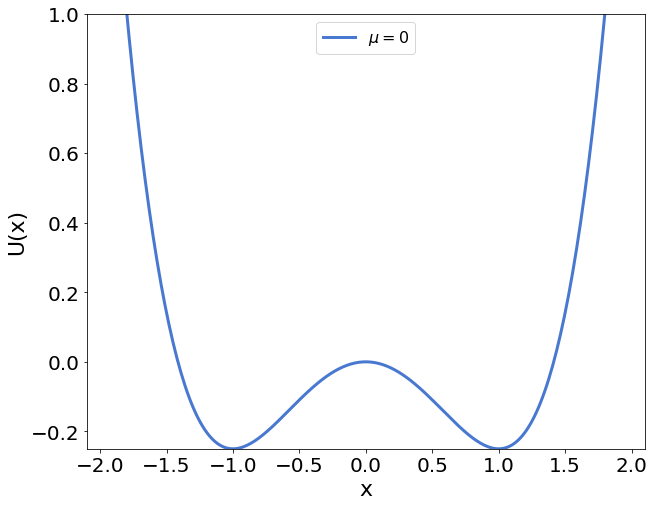

In [240]:
plt.figure(figsize=(10, 8))
cmap = sns.palettes.color_palette('muted', 5)
#plt.plot(np.linspace(-5,5, 400), U_bistable(np.linspace(-2,2, 400), -0.5), c=cmap[0], lw=3, label='$\mu=0.5$')
#plt.plot(np.linspace(-5,5, 400), U_bistable(np.linspace(-2,2, 400), -3), c=cmap[1], lw=3, label='$\mu=3$')
plt.plot(np.linspace(-3,3, 400), U_bistable(np.linspace(-3, 3, 400), 0), c=cmap[0], lw=3, alpha=1, label='$\mu=0$')
#plt.plot(np.linspace(-3,3, 400), U_bistable(np.linspace(-3, 3, 400), 0.5), c=cmap[1], lw=3, alpha=0.7, label='$\mu=0.5$')
#plt.plot(np.linspace(-3,3, 400), U_bistable(np.linspace(-3, 3, 400), 1), c=cmap[2], lw=3, alpha=0.7, label='$\mu=1$')

#plt.plot(np.linspace(-3,3, 400), U_bistable(np.linspace(-3, 3, 400), -0.5), c=cmap[3], lw=3, alpha=0.7, label='$\mu=-0.5$')
#plt.plot(np.linspace(-3,3, 400), U_bistable(np.linspace(-3, 3, 400), -1), c=cmap[4], lw=3, alpha=0.7, label='$\mu=-1$')

plt.legend(loc='upper center', fontsize=16)

plt.xlabel('x', fontsize=22)
plt.ylabel('U(x)', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-0.25, 1)
plt.xlim(-2.1, 2.1)
#plt.savefig('bistable_potential.svg', transparent=True)

## Switching Count

In [352]:
_, regime = gen_bistable(0.01, 0.0, 0.1, 5000)
print(int(regime[0] == 'Bistable Switching'))

0


In [357]:
N_values = np.linspace(50, 5000, 20)
sigma_values = np.linspace(0.1, 1, 20)

sigma_fixed = [0.1, 0.5, 1]
N_fixed = [50, 500, 5000]

switch_counts_N = np.zeros((len(sigma_fixed), len(N_values)))
switch_counts_sigma = np.zeros((len(N_fixed), len(sigma_values)))

for j, sigma in enumerate(sigma_fixed):
    for i, N in enumerate(N_values):
        switch_count = 0
        for _ in range(50):
            _, regime = gen_bistable(0.01, 0.0, sigma, N)
            if int(regime[0] == 'Bistable Switching'):
                switch_count += 1
        switch_counts_N[j, i] = switch_count/50

for j, N in enumerate(N_fixed):
    for i, sigma in enumerate(sigma_values):
        switch_count = 0
        for _ in range(50):
            _, regime = gen_bistable(0.1, 0.0, sigma, N)
            if int(regime[0] == 'Bistable Switching'):
                switch_count += 1
        switch_counts_sigma[j, i] = switch_count/50

In [358]:
switch_counts_sigma

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.08, 0.04, 0.08,
        0.12, 0.16, 0.2 , 0.18, 0.22, 0.42, 0.42, 0.46, 0.52],
       [0.  , 0.  , 0.  , 0.  , 0.04, 0.12, 0.36, 0.48, 0.64, 0.74, 0.86,
        0.96, 0.88, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]])

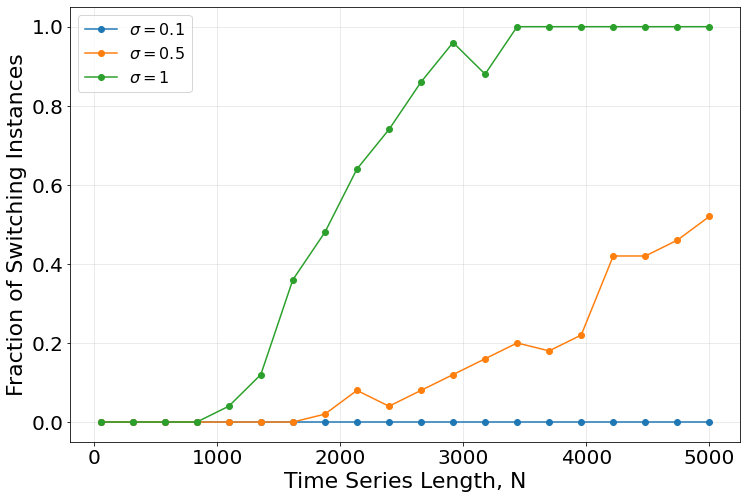

In [370]:
plt.figure(figsize=(12,8))
for i, sigma in enumerate(sigma_fixed):
    plt.plot(N_values, switch_counts_sigma[i], '-o', label=f'$\sigma={sigma}$')
plt.xlabel('Time Series Length, N', fontsize=22)
plt.ylabel('Fraction of Switching Instances', fontsize=22)
plt.legend(loc='best', fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.title('Fraction of switches as a function of N for different sigma', fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('switching_frac_N.svg', transparent=True)
#plt.show()

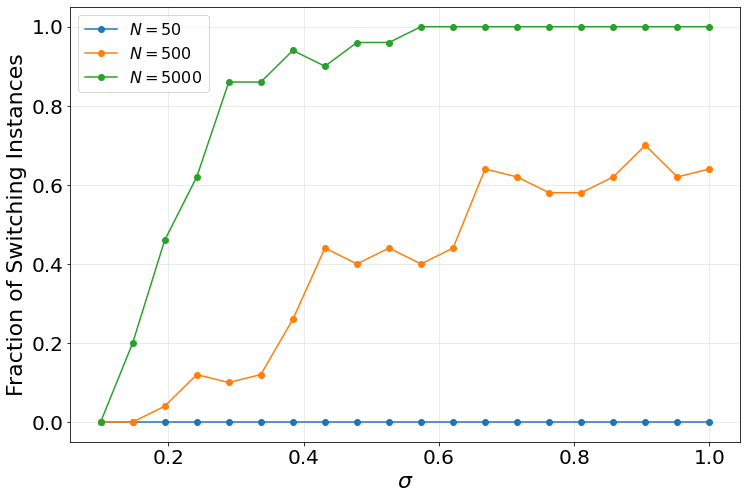

In [375]:
plt.figure(figsize=(12,8))
for i, N in enumerate(N_fixed):
    plt.plot(sigma_values, switch_counts_N[i], '-o', label=f'$N={N}$')
plt.xlabel('$\sigma$', fontsize=22)
plt.ylabel('Fraction of Switching Instances', fontsize=22)
plt.legend(loc='best', fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.title('Fraction of switches as a function of N for different sigma', fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('switching_frac_sig.svg', transparent=True)
plt.show()